## Green Belt - Lista de Exercícios 1  
### Gráficos de Tendência e de Frequência

3 - Uma Unidade de Pronto Atendimento passou a receber nas duas últimas semanas uma 
grande quantidade de reclamações relacionadas ao tempo de espera excessivo. Longos tempos 
de espera podem acarretar superlotação das unidades de saúde, sofrimento para os pacientes 
e acompanhantes e ambiente estressantes para toda equipe. A gerência dessa UPA, com o 
intuito de validar as reclamações recebidas e avaliar o cenário atual, coletou dados dos 
atendimentos das últimas quatro semanas e identificou quais atendimentos foram não 
conformes. 

Para definir se um atendimento está conforme ou não, seguiu-se o recomendado pela Agência 
Nacional de Saúde, a qual indica um tempo de espera adequado de acordo com o nível de 
classificação de risco do paciente: 

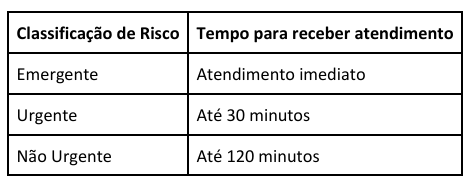

Os dados coletados estão disponíveis na planilha Green_Belt_FM2S_Lista_Exercícios_01, na 
aba 03.Atendimento_UPA.

### Importação dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/2-Measure/Exercicios/Lista_1/base_dados/Atendimento_UPA.csv'
df = pd.read_csv(url)

df.head()

,Dia,Atendimento,Classificação de Risco,Tempo de Atendimento
0,1,1057,Não Urgente,Não conforme
1,1,1058,Não Urgente,Conforme
2,1,1059,Não Urgente,Conforme
3,1,1060,Não Urgente,Conforme
4,1,1061,Urgente,Conforme


In [2]:
# Verificando os valores únicos da coluna 'Tempo de Atendimento'
print(df['Tempo de Atendimento'].unique())

['Não conforme' 'Conforme']


In [3]:
# Conta quantos atendimentos existem por Dia e Tempo de Atendimento
df_agrupado = df.groupby(['Dia', 'Tempo de Atendimento']).size().reset_index(name='Contagem')

# Pivotando os dados para colocar 'Tempo de Atendimento' como colunas
df_pivot = df_agrupado.pivot(index='Dia', columns='Tempo de Atendimento', values='Contagem').fillna(0)

# Renomeia as colunas
df_pivot = df_pivot.rename(columns={
    'Conforme': 'Atendimentos Conformes',
    'Não conforme': 'Atendimentos Não Conformes'
})

# Cria a coluna Total
df_pivot['Total'] = df_pivot['Atendimentos Conformes'] + df_pivot['Atendimentos Não Conformes']

# Reorganiza as colunas
df_pivot = df_pivot[['Atendimentos Não Conformes', 'Atendimentos Conformes', 'Total']]

# Reseta o índice para que Dia fique como coluna
df_pivot = df_pivot.reset_index()

# Exibe o resultado
df_pivot.head()


Tempo de Atendimento,Dia,Atendimentos Não Conformes,Atendimentos Conformes,Total
0,1,9,84,93
1,2,10,91,101
2,3,11,97,108
3,4,5,83,88
4,5,8,76,84


In [4]:
# Calcula os percentuais
df_pivot['% Atendimentos Conformes'] = (df_pivot['Atendimentos Conformes'] / df_pivot['Total']) * 100
df_pivot['% Atendimentos Não Conformes'] = (df_pivot['Atendimentos Não Conformes'] / df_pivot['Total']) * 100

# Reorganiza as colunas
df_pivot = df_pivot.reset_index()[[
    'Dia',
    'Atendimentos Não Conformes',
    'Atendimentos Conformes',
    'Total',
    '% Atendimentos Não Conformes',
    '% Atendimentos Conformes'
]]

# Exibe as 5 primeiras linhas
df_pivot.head().round(2)

Tempo de Atendimento,Dia,Atendimentos Não Conformes,Atendimentos Conformes,Total,% Atendimentos Não Conformes,% Atendimentos Conformes
0,1,9,84,93,9.68,90.32
1,2,10,91,101,9.90,90.10
2,3,11,97,108,10.19,89.81
3,4,5,83,88,5.68,94.32
4,5,8,76,84,9.52,90.48


### Responda:

a) Como o desempenho dos atendimentos por dia variou ao longo do tempo?

Resposta: Notamos que houve uma grande variação ao longo do tempo, nisso classificamos a porcentagem de Atendimentos Conforme e Atendimentos Não Conforme para podermos mostrar essa variação ao longo do tempo.

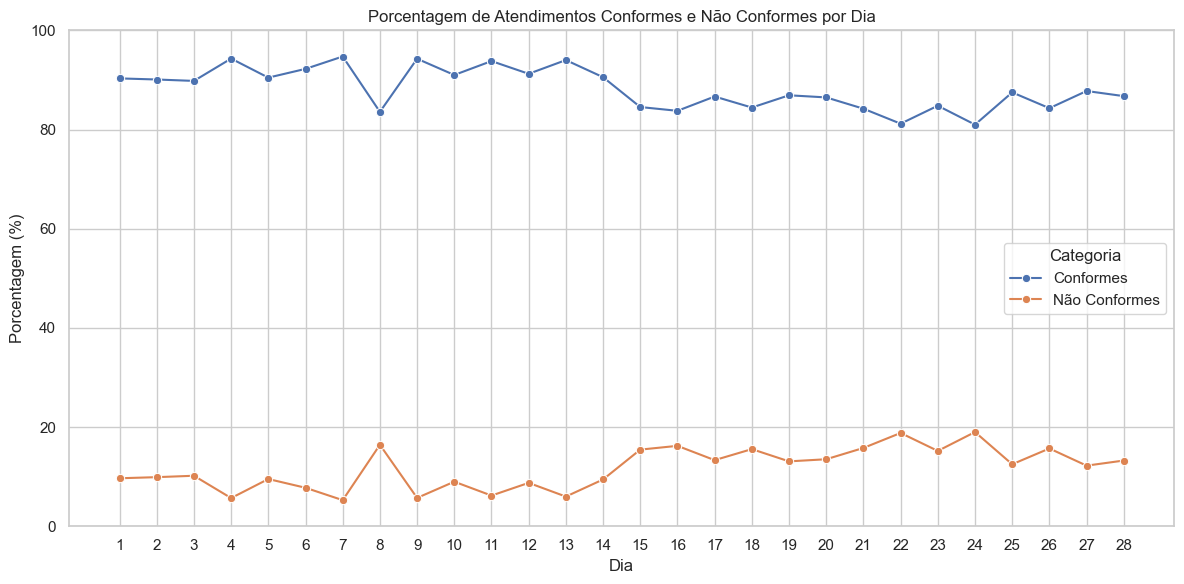

In [5]:
# Configura o estilo
sns.set(style='whitegrid')

# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Plota as séries temporais
sns.lineplot(data=df_pivot, x='Dia', y='% Atendimentos Conformes', label='Conformes', marker='o')
sns.lineplot(data=df_pivot, x='Dia', y='% Atendimentos Não Conformes', label='Não Conformes', marker='o')

# Título e rótulos
plt.title('Porcentagem de Atendimentos Conformes e Não Conformes por Dia')
plt.xlabel('Dia')
plt.ylabel('Porcentagem (%)')
plt.xticks(df_pivot['Dia'])  # Garante que todos os dias apareçam no eixo X
plt.ylim(0, 100)  # Percentual vai de 0 a 100
plt.legend(title='Categoria')
plt.tight_layout()

# Mostra o gráfico
plt.show()


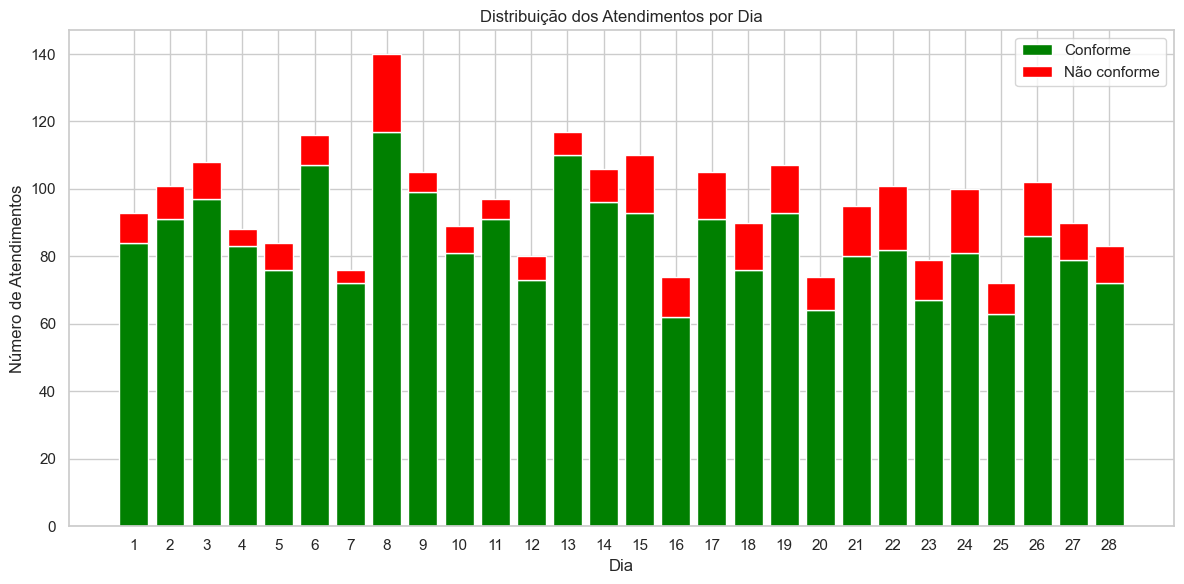

In [6]:
plt.figure(figsize=(12, 6))

# Gráfico de barras empilhadas
plt.bar(df_pivot['Dia'], df_pivot['Atendimentos Conformes'], label='Conforme', color='green')
plt.bar(df_pivot['Dia'], df_pivot['Atendimentos Não Conformes'], bottom=df_pivot['Atendimentos Conformes'], label='Não conforme', color='red')

plt.title('Distribuição dos Atendimentos por Dia')
plt.xlabel('Dia')
plt.ylabel('Número de Atendimentos')
plt.xticks(df_pivot['Dia'])
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Agrupando por 'Dia' e contando o número de atendimentos (linhas) em cada dia
contagem_por_dia = df.groupby('Dia').size().reset_index(name='Total de Atendimentos')

# Calculando a média da coluna 'Total de Atendimentos'
media_atendimentos_por_dia = contagem_por_dia['Total de Atendimentos'].mean()

print(f"Média de atendimentos por dia: {media_atendimentos_por_dia:.2f}")
print("\nContagem de atendimentos por dia:")
contagem_por_dia

Média de atendimentos por dia: 95.79

Contagem de atendimentos por dia:


,Dia,Total de Atendimentos
0,1,93
1,2,101
2,3,108
3,4,88
4,5,84
5,6,116
6,7,76
7,8,140
8,9,105
9,10,89


In [8]:
# Cálculo da correlação de Pearson
correlacao = df_pivot['Total'].corr(df_pivot['Atendimentos Não Conformes'])

print(f'Correlação entre Total de Atendimentos e Não Conformes: {correlacao:.2f}')


Correlação entre Total de Atendimentos e Não Conformes: 0.47


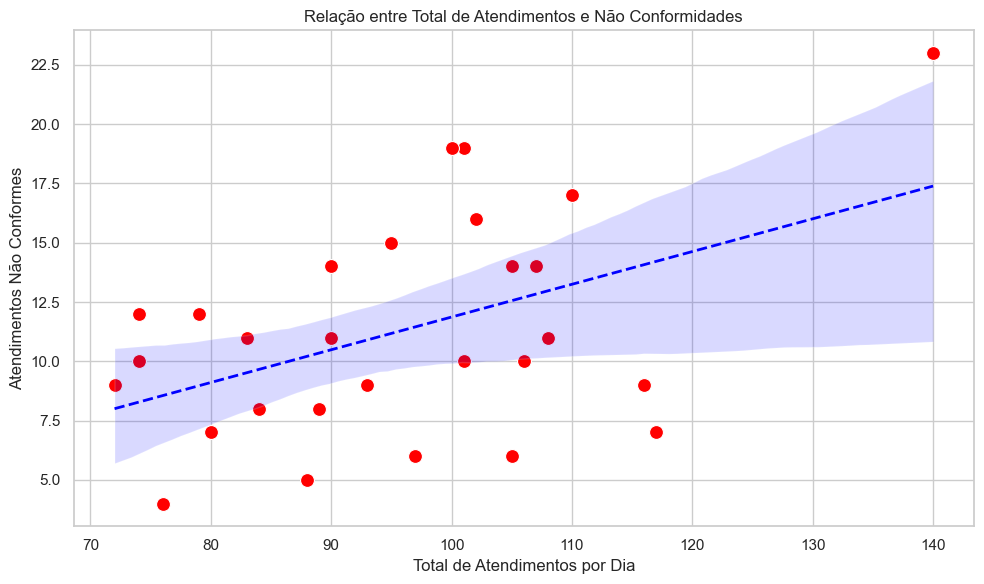

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_pivot,
    x='Total',
    y='Atendimentos Não Conformes',
    s=100,
    color='red'
)

# Linha de tendência (regressão linear)
sns.regplot(
    data=df_pivot,
    x='Total',
    y='Atendimentos Não Conformes',
    scatter=False,
    color='blue',
    line_kws={"linewidth": 2, "linestyle": "--"}
)

plt.title('Relação entre Total de Atendimentos e Não Conformidades')
plt.xlabel('Total de Atendimentos por Dia')
plt.ylabel('Atendimentos Não Conformes')
plt.grid(True)
plt.tight_layout()
plt.show()


b) Quais fatores poderiam contribuir para a variação? Há causas especiais? 

Resposta: Sim, notamos que no dia 8, o volume de atendimentos subiu 44.21 acima da média.

c) Há diferenças em relação aos atrasos de acordo com cada classificação de risco? 

Resposta: Sim, quando estratificamos os dias, notamos que a classificação de risco "Urgente" teve um aumento de mais de 20% nos atendimentos não conforme.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame 'df' já exista e tenha as colunas 'Classificação de Risco' e 'Status'

df_agrupado_barras = df.groupby(['Classificação de Risco', 'Tempo de Atendimento']).size().unstack(fill_value=0)

print("DataFrame Agrupado para Gráfico de Barras:")
df_agrupado_barras

DataFrame Agrupado para Gráfico de Barras:


Tempo de Atendimento,Conforme,Não conforme
Classificação de Risco,,
Emergente,102,5
Não Urgente,1807,150
Urgente,457,161


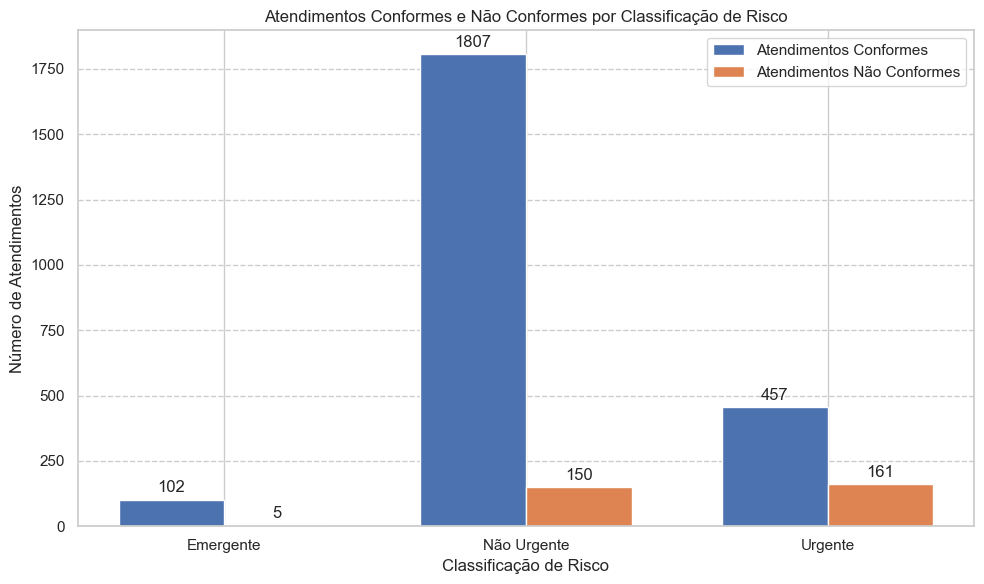

In [11]:
import matplotlib.pyplot as plt
import numpy as np

categorias_risco = df_agrupado_barras.index
largura_barra = 0.35
x = np.arange(len(categorias_risco))

fig, ax = plt.subplots(figsize=(10, 6))
barra_conforme = ax.bar(x - largura_barra/2, df_agrupado_barras['Conforme'], largura_barra, label='Atendimentos Conformes')
barra_nao_conforme = ax.bar(x + largura_barra/2, df_agrupado_barras['Não conforme'], largura_barra, label='Atendimentos Não Conformes')

# Função para formatar os rótulos em percentual
def formatar_percentual(valor):
    total = df_agrupado_barras.loc[categorias_risco[x[list(barra_conforme).index(valor.artist)]], ['Conforme', 'Não conforme']].sum()
    percentual = (valor.datavalue / total) * 100
    return f'{percentual:.1f}%'

# Adicionando rótulos de dados
ax.bar_label(barra_conforme, padding=3)
ax.bar_label(barra_nao_conforme, padding=3)

ax.set_xlabel('Classificação de Risco')
ax.set_ylabel('Número de Atendimentos')
ax.set_title('Atendimentos Conformes e Não Conformes por Classificação de Risco')
ax.set_xticks(x)
ax.set_xticklabels(categorias_risco)
ax.legend()
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

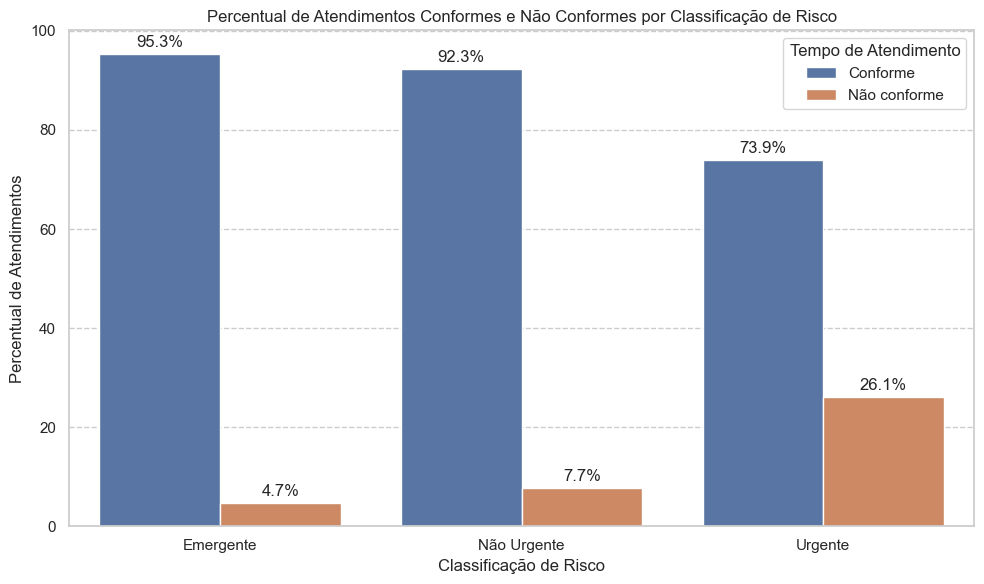

In [12]:
df_long = df.groupby(['Classificação de Risco', 'Tempo de Atendimento']).size().reset_index(name='Número de Atendimentos')

# Calcular o total de atendimentos por Classificação de Risco
total_por_risco = df_long.groupby('Classificação de Risco')['Número de Atendimentos'].transform('sum')
df_long['Percentual'] = (df_long['Número de Atendimentos'] / total_por_risco) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Classificação de Risco', y='Percentual', hue='Tempo de Atendimento', data=df_long)
plt.title('Percentual de Atendimentos Conformes e Não Conformes por Classificação de Risco')
plt.xlabel('Classificação de Risco')
plt.ylabel('Percentual de Atendimentos')
plt.grid(axis='y', linestyle='--')

# Adicionando rótulos de dados em percentual
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

In [13]:
# Supondo que seu DataFrame 'df' já exista e tenha uma coluna chamada 'Dia'

def estratificar_dia(dia):
    if 1 <= dia <= 14:
        return 'Antes'
    else:
        return 'Depois'

# Aplica a função 'estratificar_dia' à coluna 'Dia' e cria a nova coluna 'Estratificação Dia'
df['Estratificação Dia'] = df['Dia'].apply(estratificar_dia)

# Exibe as primeiras linhas do DataFrame com a nova coluna
df.head()

,Dia,Atendimento,Classificação de Risco,Tempo de Atendimento,Estratificação Dia
0,1,1057,Não Urgente,Não conforme,Antes
1,1,1058,Não Urgente,Conforme,Antes
2,1,1059,Não Urgente,Conforme,Antes
3,1,1060,Não Urgente,Conforme,Antes
4,1,1061,Urgente,Conforme,Antes


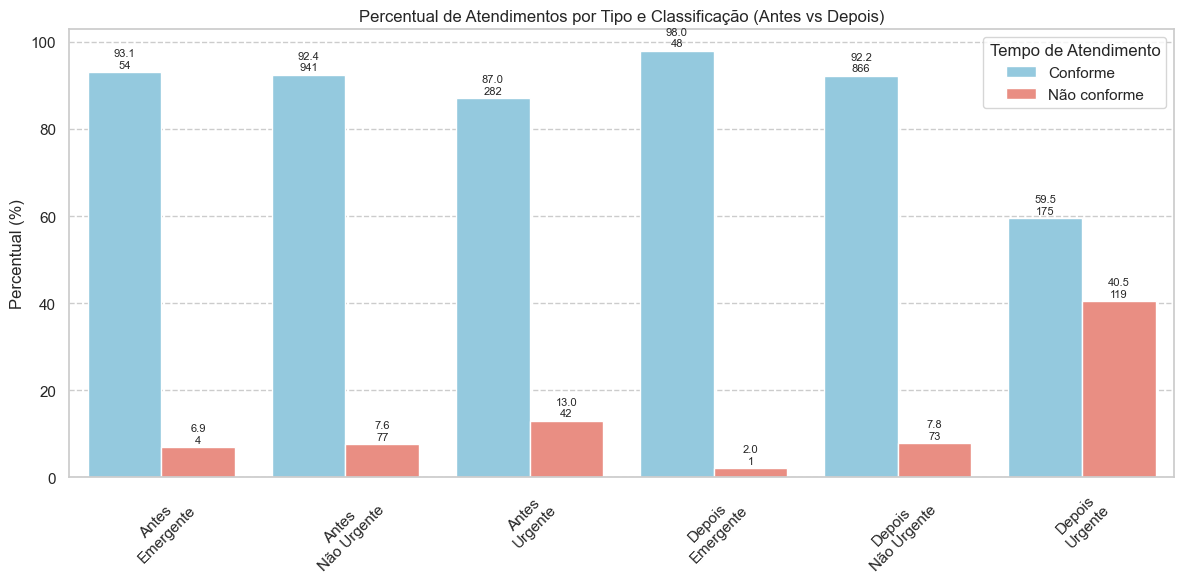

In [14]:
# 'Classificação de Risco', 'Tempo de Atendimento' ('Conforme'/'Não conforme'), e 'Estratificação Dia' ('Antes'/'Depois')

# Agrupamento e cálculo de percentual
df_agrupado = df.groupby(['Estratificação Dia', 'Classificação de Risco', 'Tempo de Atendimento']).size().reset_index(name='Qtd')
df_agrupado['Total'] = df_agrupado.groupby(['Estratificação Dia', 'Classificação de Risco'])['Qtd'].transform('sum')
df_agrupado['Percentual'] = (df_agrupado['Qtd'] / df_agrupado['Total']) * 100

# Criando rótulo no eixo X com junção da Estratificação e Classificação
df_agrupado['Grupo'] = df_agrupado['Estratificação Dia'] + '\n' + df_agrupado['Classificação de Risco']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Grupo', y='Percentual', hue='Tempo de Atendimento', data=df_agrupado,
                 palette={'Conforme': 'skyblue', 'Não conforme': 'salmon'},
                 hue_order=['Conforme', 'Não conforme'])

# Adicionando os valores no topo das barras
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width()/2,
                altura + 1,
                f'{altura:.1f}\n{int(df_agrupado.loc[df_agrupado["Percentual"] == altura, "Qtd"].values[0])}',
                ha='center', fontsize=8)

plt.title('Percentual de Atendimentos por Tipo e Classificação (Antes vs Depois)')
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend(title='Tempo de Atendimento')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()
